In [2]:
from nltk.corpus import PlaintextCorpusReader
from gensim import corpora, models
import nltk
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import re
import numpy

In [3]:
sonnetsCorpus = PlaintextCorpusReader("dev", ".*\.txt")

In [4]:
print(len(sonnetsCorpus.fileids()))

10970


In [5]:
def get_lists_of_words(corpus, **kwargs): 
    documents = [] # каждый документ у нас будет представлен как список слов
    for fileid in corpus.fileids(): # идем по каждому файлу
        
        # оставляем только слова и приводим их к нижнему регистру
        words = [token.lower() for token in corpus.words(fileid) if any([c for c in token if c.isalpha()])]
        
        # убираем слова длины меньше minlength - если такая задана
        if "minLen" in kwargs and kwargs["minLen"]: 
            words = [word for word in words if len(word) >= kwargs["minLen"]]
        
        # удаляем стоп-слова, если они опять же определены
        if "stopwords" in kwargs and kwargs["stopwords"]: 
            words = [word for word in words if word not in kwargs["stopwords"]]

        
        documents.append(words) # добавляем list of words
    
    return documents # возвращаем наши документы

In [6]:
sonnetsStopwords = nltk.corpus.stopwords.words('english') # загружаем список стоп-слов
sonnetsStopwords += ["thee", "thou", "thy"] # добавляем еще немного слов

In [7]:
sonnetsWords = get_lists_of_words(sonnetsCorpus, stopwords=sonnetsStopwords, minLen=3)

In [8]:
for i in range(0,10): # первые 2 документа
    print("document", str(i), sonnetsWords[i][0:5])

document 0 ['global', 'daily', 'spain', 'italy', 'radar']
document 1 ['optimisme', 'china', 'stuwt', 'industriële', 'metaalprijzen']
document 2 ['eindhoven', 'makes', 'two', 'second', 'dutch']
document 3 ['global', 'daily', 'reserves', 'microscope', 'markets']
document 4 ['forrester', 'online', 'revenue', 'made', 'noticeable']
document 5 ['nyx', 'cosmetics', 'rolling', 'experience', 'nyx']
document 6 ['google', 'facebook', 'win', 'big', 'online']
document 7 ['target', 'snatches', 'shipt', 'speed', 'day']
document 8 ['global', 'daily', 'fed', 'sticks', 'fed']
document 9 ['rise', 'raw', 'material', 'prices', 'due']


In [9]:
def get_lda_from_lists_of_words(lists_of_words, **kwargs):
    dictionary = corpora.Dictionary(lists_of_words) # делаем преобразование (терм -> число)
    corpus = [dictionary.doc2bow(text) for text in lists_of_words] 
    tfidf = models.TfidfModel(corpus) # считаем tf-idf для слов
    corpus_tfidf = tfidf[corpus] #
    kwargs["id2word"] = dictionary # устанавливаем словарь
    return models.LdaModel(corpus_tfidf, **kwargs) # возвращаем топики

In [10]:
%%time
#topic_model = gl.topic_model.create(docs, num_topics=15, num_iterations=3000)

sonnetsLda = get_lda_from_lists_of_words(sonnetsWords, num_topics=100, passes=20,iterations=300)
print(sonnetsLda)

LdaModel(num_terms=51878, num_topics=100, decay=0.5, chunksize=2000)
CPU times: user 39min 6s, sys: 47 s, total: 39min 53s
Wall time: 17min 54s


In [11]:
num_terms=10
num_topics = 100

In [12]:
for i in range(0, num_topics):
    terms = [val for val, term in sonnetsLda.show_topic(i, num_terms)]
    print("Top  terms for topic #", str(i), ": ", ", ".join(terms))  

Top  terms for topic # 0 :  tiffany, brabant, wealthy, contemporary, boundaries, ohio, farmer, clearer, brutal, lucky
Top  terms for topic # 1 :  schools, bean, rail, pupils, employer, cos, sugar, elderly, leiden, cocoa
Top  terms for topic # 2 :  rewards, handmade, joe, blockbuster, dijsselbloem, organic, trader, orange, acceptance, artisans
Top  terms for topic # 3 :  burberry, anderson, thomson, profitero, nasty, catering, keith, died, bailey, concrete
Top  terms for topic # 4 :  jet, staples, office, depot, urban, gen, robots, analysts, merger, johnson
Top  terms for topic # 5 :  cff, sponsor, rural, santander, muscle, seb, foreigners, unicredit, lynch, lbbw
Top  terms for topic # 6 :  costco, nordstrom, reviews, starbucks, rack, trunk, mail, curbside, perkins, pilot
Top  terms for topic # 7 :  kpn, teeven, abusing, liberty, mikelsons, merit, haarlem, upping, possession, hotline
Top  terms for topic # 8 :  aisles, disciplined, socks, spite, optimized, irrelevant, sizing, copied, co

In [13]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 500)

data = []
for i in range(0, num_topics):
    terms = [val for val, term in sonnetsLda.show_topic(i, num_terms)]    
    data.append({'name':'topic '+str(i),'words':", ".join(terms)})
reviews = pd.DataFrame(data=data)
reviews.columns = ['Topic','words']

In [14]:
reviews

,Topic,words
0,topic 0,"tiffany, brabant, wealthy, contemporary, boundaries, ohio, farmer, clearer, brutal, lucky"
1,topic 1,"schools, bean, rail, pupils, employer, cos, sugar, elderly, leiden, cocoa"
2,topic 2,"rewards, handmade, joe, blockbuster, dijsselbloem, organic, trader, orange, acceptance, artisans"
3,topic 3,"burberry, anderson, thomson, profitero, nasty, catering, keith, died, bailey, concrete"
4,topic 4,"jet, staples, office, depot, urban, gen, robots, analysts, merger, johnson"
5,topic 5,"cff, sponsor, rural, santander, muscle, seb, foreigners, unicredit, lynch, lbbw"
6,topic 6,"costco, nordstrom, reviews, starbucks, rack, trunk, mail, curbside, perkins, pilot"
7,topic 7,"kpn, teeven, abusing, liberty, mikelsons, merit, haarlem, upping, possession, hotline"
8,topic 8,"aisles, disciplined, socks, spite, optimized, irrelevant, sizing, copied, councillor, fever"
9,topic 9,"composite, cbre, hong, kong, payless, taiwan, gate, miller, golden, rentals"


In [19]:
def graph_terms_to_topics(lda, num_terms=10):
    
    # создаем новый граф
    G = nx.Graph()
    plt.figure(figsize=(10,10))

    # создаем вершины
    for i in range(0, lda.num_topics):
        topicLabel = "topic "+str(i)
        terms = [val for val, term in lda.show_topic(i, num_terms)]                
        
        for term in terms:
            G.add_edge(topicLabel, term)
    
    pos = nx.spring_layout(G) # это один из способов визуализации графа
    
    # топики и названия термов будут иметь разный цвет в нашем случае
    g = G.subgraph([topic for topic, _ in pos.items() if "topic " in str(topic)])
    nx.draw_networkx_labels(g, pos,  font_color='r')
    g = G.subgraph([term for term, _ in pos.items() if "topic " not in str(term)])
    nx.draw_networkx_labels(g, pos)
    
    # рисуем
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), alpha=0.1)

    plt.axis('off')
    plt.show()


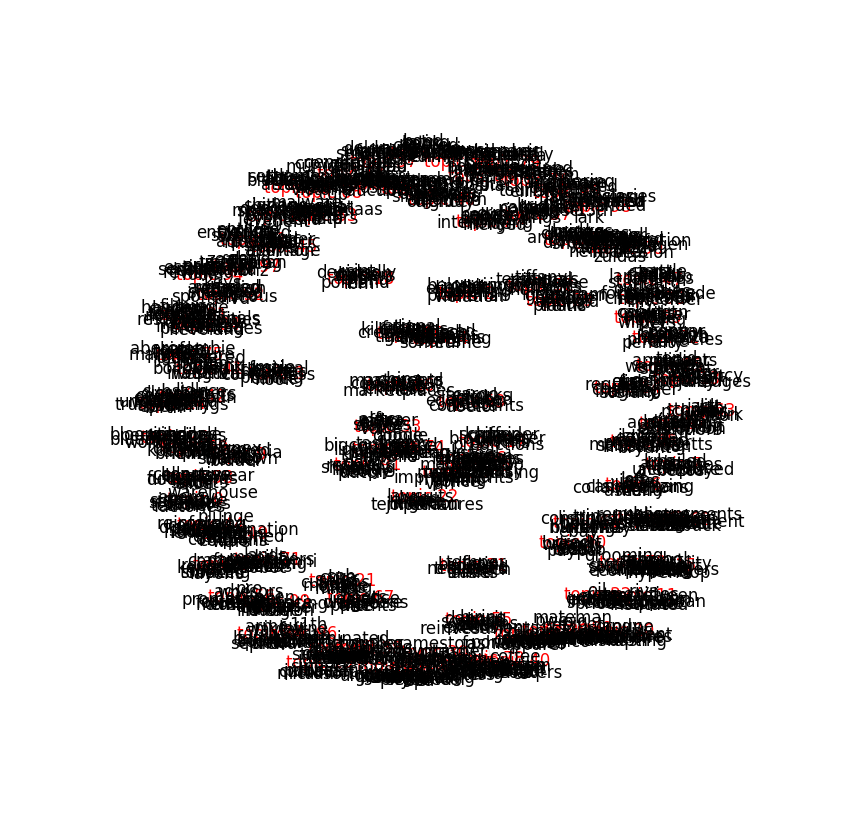

In [20]:
graph_terms_to_topics(sonnetsLda)

In [21]:
import pyLDAvis.gensim as gensimvis
import pyLDAvis

In [25]:
dictionary = corpora.Dictionary(sonnetsWords)
corpus = [dictionary.doc2bow(doc) for doc in sonnetsWords]
vis_data = gensimvis.prepare(sonnetsLda, corpus, dictionary)
pyLDAvis.display(vis_data)

In [ ]:
dictionary = corpora.Dictionary(sonnetsWords)

In [87]:
punctuation_string = ', . ! ? '
def getTopicForQuery (question):
    temp = question.lower()    
    for i in range(len(punctuation_string)):
        temp = temp.replace(punctuation_string[i], ' ')

    words = re.findall(r'\w+', temp, flags = re.UNICODE | re.LOCALE)
    
    important_words = []
    important_words = filter(lambda x: x not in sonnetsStopwords, words)

    ques_vec = []
    ques_vec = dictionary.doc2bow(important_words)    
    
    topic_vec = []
    topic_vec = sonnetsLda[ques_vec]

    word_count_array = numpy.empty((len(topic_vec), 2), dtype = numpy.object)
    for i in range(len(topic_vec)):
        word_count_array[i, 0] = topic_vec[i][0]
        word_count_array[i, 1] = topic_vec[i][1]

    idx = numpy.argsort(word_count_array[:, 1])    
    idx = idx[::-1]
    word_count_array = word_count_array[idx]
    
    #terms = [val for val, term in sonnetsLda.show_topic(i, num_terms)]
    
    
    final = sonnetsLda.print_topic(word_count_array[0, 0], 6)
    question_topic = ''
    for element in final.split(' + '):
        temp = element.split('*"')[1][:-1]
        question_topic+=" "+temp

    return topic_vec[0][0],question_topic

In [88]:
test = "swiss, franc, ollongren, snb, chamber, chf, witnesses, examine, answers, lelystad"
getTopicForQuery(test)

(92, ' swiss franc ollongren snb chamber chf')

In [20]:
sonnetsLda.save('LDA-dev.model')

In [90]:
dictionary.save('LDA-dev.model.dict')

In [91]:
sonnetsStopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 '

In [93]:
import pickle
file = open('LDA-dev.model.stopwords.p', 'wb')
# dump information to that file
pickle.dump(sonnetsStopwords, file)
# close the file
file.close()